# Dimensionality Reduction 
## Purposes 
1. Vizualization
  * Subgroups e.g. clusters
2. Modeling 
  * Curse of dimensionality
      * Multicollinearity, distances converge to zero, harder to optimize
  * Number of sample points greater than the number of variables
      * DNA sequences
3. Computational intensity
  * speed
  * space

## Definition

Given a data matrix of n variables and d sample points
$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$ 
we aim to obtain 
$\begin{bmatrix}
    x_{11}   & \dots  & x_{1m} \\
    x_{21}   & \dots  & x_{2m} \\
    \vdots   & \ddots & \vdots \\
    x_{d1}   & \dots  & x_{dm}
\end{bmatrix}$ where m < n
## Limitations
* We cannot retain complete information, we have to sacrifice something

**Inspired by http://colah.github.io/posts/2014-10-Visualizing-MNIST/ , see for further details**

In [22]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

from sklearn import *

def labeler(frame):
    df = frame.copy()
    
    df['label'].replace(0,'zero', inplace = True)
    df['label'].replace(1,'one', inplace = True)
    df['label'].replace(2,'two', inplace = True)
    df['label'].replace(3,'three', inplace = True)
    df['label'].replace(4,'four', inplace = True)
    df['label'].replace(5,'five', inplace = True)
    df['label'].replace(6,'six', inplace = True)
    df['label'].replace(7,'seven', inplace = True)
    df['label'].replace(8,'eight', inplace = True)
    df['label'].replace(9,'nine', inplace = True)
    
    return df

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# MDS (Multidimensional Scaling)
* We can obtain a dissimilarity measure for each pair of distinct points in original space
    * Euclidean, Mahalanobis (better if you don't scale), ... 
* We can obtain it even in transformed lower dimensional space
    * Distant points in original space should remain distant in new space
    * Near points in original space should remain near in new space 
* Therefore, we can define a loss Funtion $$ L =\sum_{i,j=1}^{d} (d_{orig}(x_i,x_j)-d_{new}(x_i,x_j))^{2}$$
* No close form solution, but you can minimize it approximately by iterative improvements

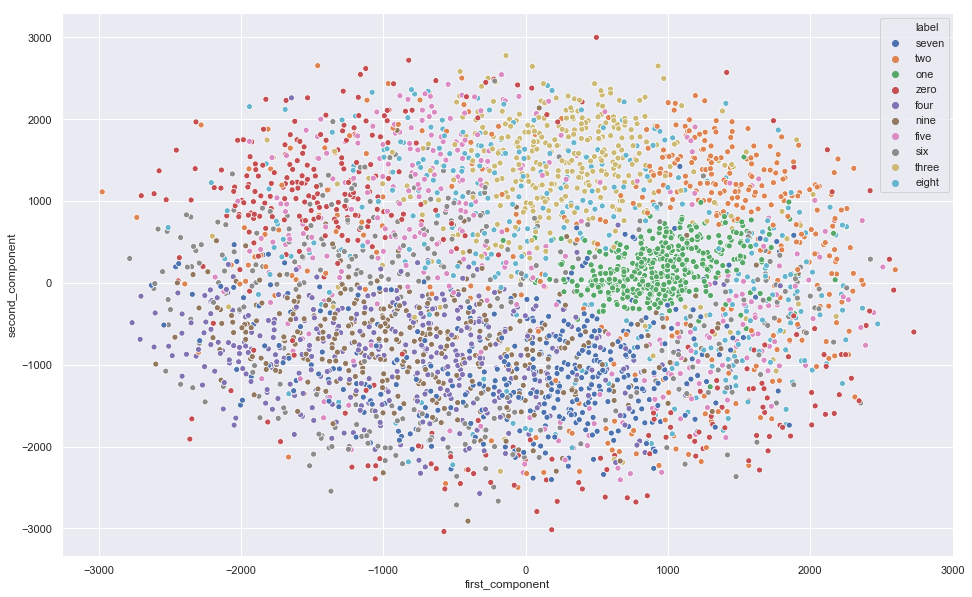

In [45]:
#MDS

mnist = pd.read_csv('mnist_test.csv')
mds = manifold.MDS(n_components=2,
                   metric=True,
                   n_init=1,
                   max_iter=300,
                   dissimilarity='euclidean')

mds_2d = pd.DataFrame(mds.fit_transform(mnist.loc[:3500, mnist.columns != 'label']),
                      columns = ['first_component','second_component'])
mds_2d = labeler(mds_2d.join(mnist['label']))

plt.figure(figsize=(16, 10))
sns.scatterplot(x="first_component",
                y="second_component",
                hue="label",
                data=mds_2d)



# Sammon’s Mapping
* Let's assume vectors a,b and c,d
    * In original space d(a,b) = 1 & d(c,d) = 100
    * In new space d(a,b) = 2 & d(c,d) = 101
    * the penalty is both for each pair (1)
    * However, the distance between a,b doubled and distance between nearly did not change
* Solution is weighing the penalty by the inverse distance
* Cost function $$ L =\sum_{i,j=1}^{d} (d_{orig}(x_i,x_j)-d_{new}(x_i,x_j))^{2}/d_{orig}(x_i,x_j)$$

# PCA (Pricipal Component Analysis)
* In case of PCA we wish to retain linear relationships (c*L(x) = L(c*x) & L(u+v) = L(u) + L(v))
  * Parallel lines will remain parallel 
  * Distances between those lines will retain same ratios
  * In practice it squishes and rotates the grid
* We know that any linear transformation can be represented by a matrix
* Infinitely many  solutions (squishing) - speed depends on the spectral decomposition
* In reality it just rotates the axis in a way which maximizes variance
* Moreover, it is a projection which minimizes the square error
* It has a closed-form solution, speed only depends on the spectral decomposition 
## How it can get wrong? 
* scaling 
* Non-linearity

## Rule of thumbs
* Don't use PCA regression
* use the "elbow rule" to determine the number of components

## Links
https://arxiv.org/pdf/1404.1100.pdf

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

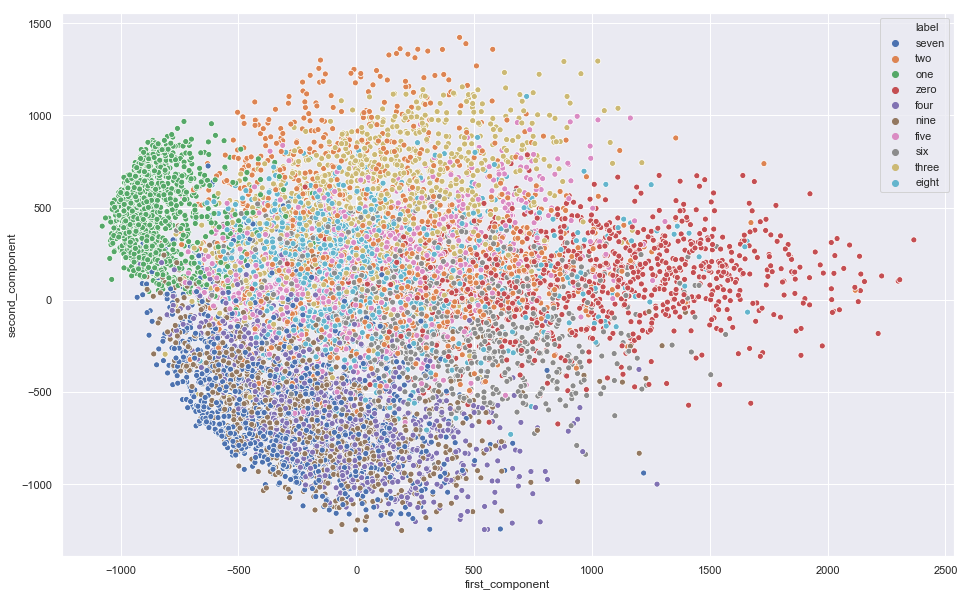

In [24]:
#PCA

mnist = pd.read_csv('mnist_test.csv')
pca = decomposition.PCA(n_components=2)
pca_2d = pd.DataFrame(pca.fit_transform(mnist.loc[:, mnist.columns != 'label']),
                      columns = ['first_component','second_component'])
pca_2d = labeler(pca_2d.join(mnist['label']))

plt.figure(figsize=(16, 10))
sns.scatterplot(x="first_component",
                y="second_component",
                hue="label",
                data=pca_2d)

# Factor Analysis
* General case of PCA
* Allows for heteroscedastic errors
* Somehow "shaky" fundamentals
* Allow for errors
* Assumes unobserved fuctors to be uncorrelated
* Used in psychology and psychometrics

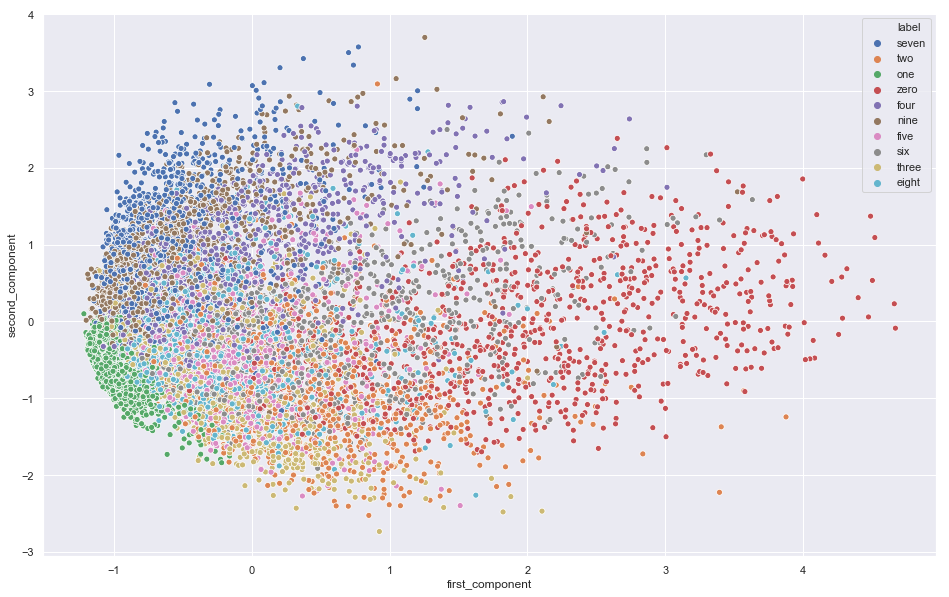

In [47]:
#FA

mnist = pd.read_csv('mnist_test.csv')
fa = decomposition.FactorAnalysis(n_components=2)
fa_2d = pd.DataFrame(fa.fit_transform(mnist.loc[:, mnist.columns != 'label']),
                      columns = ['first_component','second_component'])
fa_2d = labeler(fa_2d.join(mnist['label']))

plt.figure(figsize=(16, 10))
sns.scatterplot(x="first_component",
                y="second_component",
                hue="label",
                data=fa_2d)

# t-SNE (Stochastic Neighbor Embedding)
* Flexible, trendy, good for non-linear data
* Non-deterministic,
* Density and distance are not interpretable
* Sensitive on parameters
* Cannot be used as a classification method (non-revertable)
* No guarantee it works well in dimensions > 3 
 

## Rule of thumbs
* Use it multiple times
* aim to a 4-digit number of steps
* increase the perplexity with the data oplexite

## Links
https://distill.pub/2016/misread-tsne/

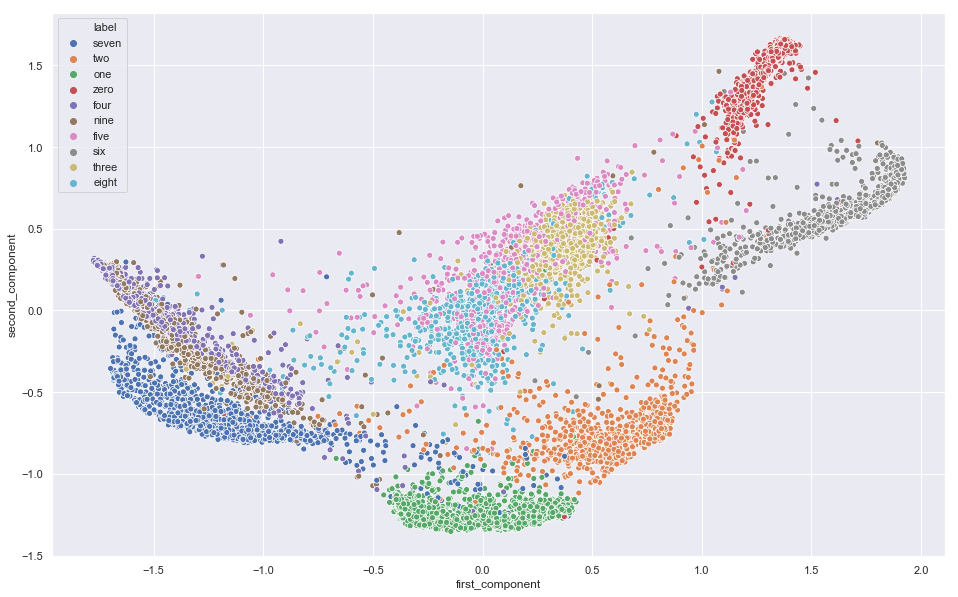

In [33]:
#t-SNE Lot litlle iteration (still within recomended range from from sklearn documentation)
tsne = manifold.TSNE(n_components=2, init='random', n_iter=250)
tsne_2d = tsne.fit_transform(mnist.loc[:, mnist.columns != 'label'])

tsne_2d = pd.DataFrame(tsne_2d,
                       columns = ['first_component','second_component'])

tsne_2d = labeler(tsne_2d.join(mnist['label']))

plt.figure(figsize=(16, 10))
sns.scatterplot(x="first_component",
                y="second_component",
                hue="label",
                data=tsne_2d)

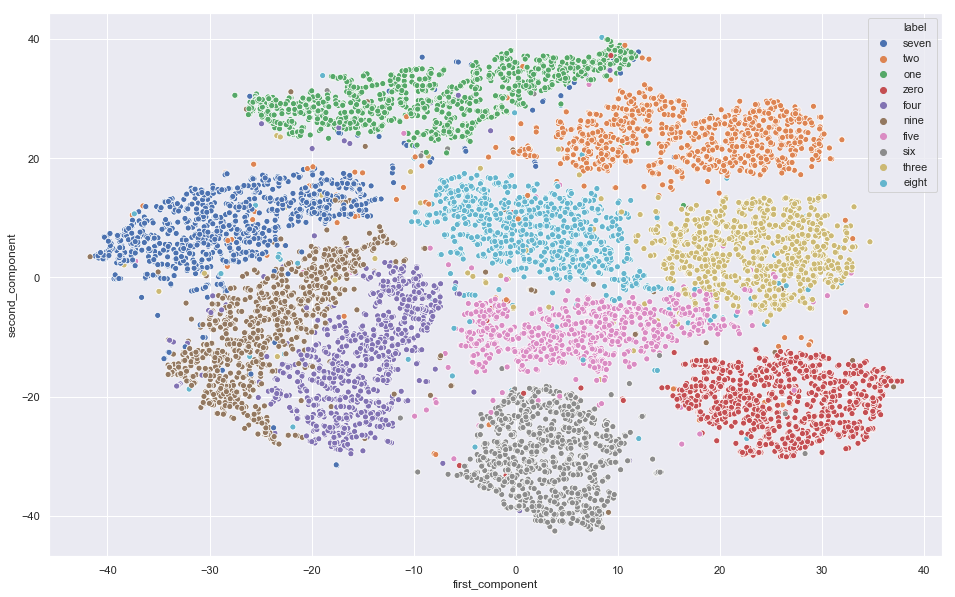

In [34]:
#t-SNE Lot litlle iteration (still within recomended range from from sklearn documentation)
tsne = manifold.TSNE(n_components=2, init='random', n_iter=500)
tsne_2d = tsne.fit_transform(mnist.loc[:, mnist.columns != 'label'])

tsne_2d = pd.DataFrame(tsne_2d,
                       columns = ['first_component','second_component'])

tsne_2d = labeler(tsne_2d.join(mnist['label']))

plt.figure(figsize=(16, 10))
sns.scatterplot(x="first_component",
                y="second_component",
                hue="label",
                data=tsne_2d)

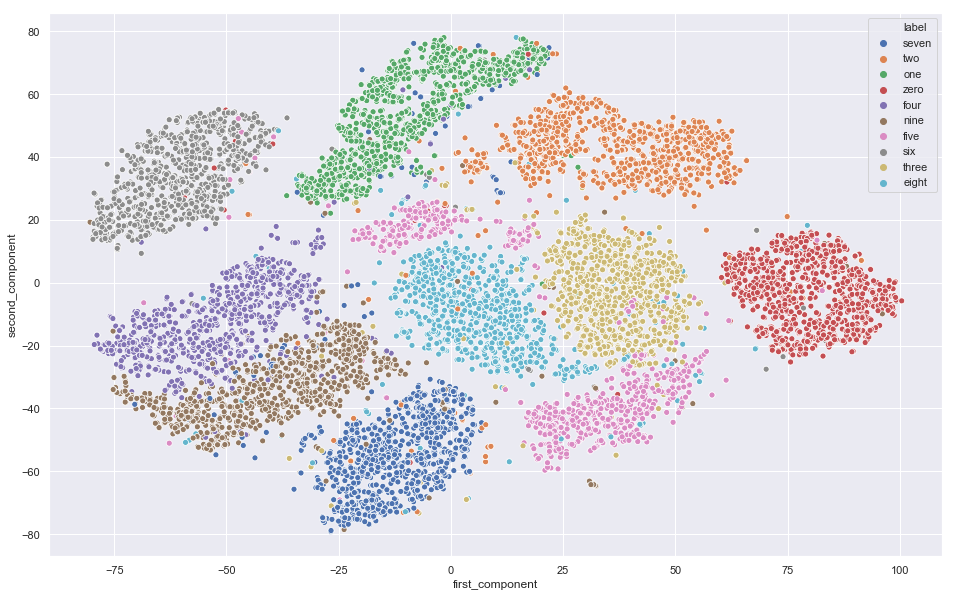

In [31]:
#t-SNE Lot of iterations 
tsne = manifold.TSNE(n_components=2, init='random', n_iter=1000)
tsne_2d = tsne.fit_transform(mnist.loc[:, mnist.columns != 'label'])

tsne_2d = pd.DataFrame(tsne_2d,
                       columns = ['first_component','second_component'])

tsne_2d = labeler(tsne_2d.join(mnist['label']))

plt.figure(figsize=(16, 10))
sns.scatterplot(x="first_component",
                y="second_component",
                hue="label",
                data=tsne_2d)

# How to use it in practice
* The initial inspection (can we find cluster/structure or is it random)
* Estimate of classification accuracy
* Frequently used to visualize NN decision boundaries
    * find clusters of activation for test cases and look for patterns (for instance, cluster I. - edges)

# How to use it incorrectly
* Finding number of clusters
* Classification